# Intro

Ultrashort pulse lasers with high peak powers have several applications in important areas, such as
plasma physics, fusion, high harmonic generation for X-rays and biology. Over the years, the maximum power achieved by laser pulse generation has been increasing by several orders of magnitude,
reaching the Petawatt regime (1015W).

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, init_printing
from IPython.display import display

The electric field is a magnitude with amplitude and phase that depends on the three spatial coordinates (x,y,z) and the time. Despite being a real function it is usually expressed as a complex one. The actual electric field is simply the real part of the complex representatation. The complete expression for the electric field is given by:

$$
E(x,y,z,t) = A(x,y,z,t) e^{i \left( \omega_0 t - k r + \varphi(x,y,z,t) \right)}
$$


By agreement, the propagation direction of the pulse is chosen to be the z-axis and k can be considered a scalar, then k*r is simply k*z. k is the wave number and is the sptatial equivalent to the angular frequency w0 in time. Therefore the electric field oscillates in time t and space z. 

In [32]:
c = 0.3    # microns/fs
l0 = 0.8   # microns
k = 2*np.pi/l0
w0= c*k

The space and time magnitudes of the electromagnetic wave are connected by the speed of light in vacuum c.
If the pulse propagates inside a medium, the velocity of propagation is given by: v= c/n(w) , ln=l0/n(w0) and k=2*pi*n(w0)/l0
since the pulse propagates in the z-axis, in general we will observe the electric field at a certain plane corresponding to the propagation distance z=z0. thus, we will obviate the dependence on z, expressing the electric field as: 
$$ E(x,y,t) = E(x,y,z,t) \Big|_{z=z_0} = A(x,y,t) e^{i \left( \omega_0 t - k z_0 + \varphi(x,y,t) \right)} $$

## Ultrashort laser pulses in the temporal domain

leaving aside the spatial dependence (x,y), the time dependent electric field E(t) of an ultrashort pulse is expressed as:
$$ E(t) = A(t) e^{i \left( \omega_0 t + \varphi(t) \right)} $$
A(t) is known as the envelope of the pulse

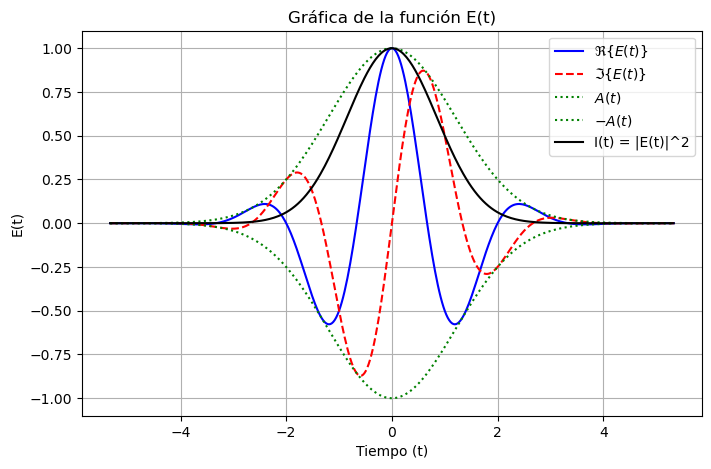

In [97]:
Period=2*np.pi/w0
t = np.linspace(-2*Period,2*Period,400)

# Definición de parámetros
A0 = 1
Delta_t = 2

# Definir la fase como una función arbitraria (ejemplo: senoidal)
#phi_t = 0.5 * np.sin(2 * np.pi * t / Delta_t)
phi_t=0
A_t = A0 * np.exp(-2 * np.log(2) * (t / Delta_t)**2)

# Definir la función E(t)
E_t = A_t * np.exp(1j * (w0 * t + phi_t))

# Función intensidad
I_t = np.abs(E_t)**2

# Graficar la magnitud de E(t)
plt.figure(figsize=(8, 5))
plt.plot(t, np.real(E_t), label=r'$\Re\{E(t)\}$', color='b')
plt.plot(t, np.imag(E_t), label=r'$\Im\{E(t)\}$', color='r', linestyle='dashed')
plt.plot(t, A_t, label=r'$A(t)$', color='g', linestyle='dotted')
plt.plot(t, -A_t, label=r'$-A(t)$', color='g', linestyle='dotted')
plt.plot(t, I_t, label='I(t) = |E(t)|^2', color='k')
plt.xlabel("Tiempo (t)")
plt.ylabel("E(t)")
plt.title("Gráfica de la función E(t)")
plt.legend()
plt.grid()
plt.show()


The intensity of the pulse I(t) is defined as the square of the module of the electric field: I(t) = |E(t)|^2 = |A(t)|^2 and it is measured in units of power. Although the correct term used in radiometry is the radiant flux or radiant power, in our field it is usually known as intensity.

# Electric field in the spectral domain and Fourier-transform

Ultrashort laser pulses are not monochromatic. The pulse is composed of multliple waves with different frequency, amplitude and phase.  The laser spectrum represents its frequency content. In fact, the electric field can be expressed, equivalently, in themporal and frequency domains.  In the spectral domain, the complex representation of the field $E_f(\omega)=A_f(\omega) \exp \left\{ i \theta(\omega)\right\} $ is determined by the specrtral amplitude and the spectral phase. The spectral density power is defined as $ S(\omega)=|E_f(\omega)|^2 $ . We will simple refer to it as the spectrum.  the field can be expressed as: 
$$ E_f(\omega)= |E_f(\omega)| \exp \left\{ i \theta(\omega) \right\} $$
The transformation between these domains is given by the Fourier-transform. Since we work with the complex representation of the field, we will use the complex FT. The definition of the fourier transform used is:
$$ \mathcal{F} \{ g(t) \} = G(\omega) = \int_{-\infty}^{\infty} g(t) e^{-i \omega t} \, dt $$
$$ \mathcal{F}^{-1} \{ G(\omega) \} = g(t) = (2 \pi)^{-1} \int_{-\infty}^{\infty} G(\omega) e^{i \omega t} \, d\omega $$
Among others, the FT (and IFT) has the properties of linearity and translation. The traslation property implies the relation $ \mathcal{F} \{g(t-\tau)\}=e^{-i \omega \tau}G(\omega) $

In the case of expressing the power spectral density with another variable, for example the wavelength $ \lambda $, the transformation to the new density is not just a change of axis. However, owing to the conservation of the integral of the density, it must verify: $$ \int_{0}^{\infty} S_\omega (\omega) d \omega= \int_{0}^{\infty} S_\lambda (\lambda) d \lambda $$
Since $ \omega = 2* \pi c/ \lambda $ the differentials are related by $ d \omega = -(2 \pi c / \lambda ^2 ) d \lambda $ and, from this, it is derived that $ S_\omega ( \omega) = [(\lambda^2 /2 \pi c) S_\lambda)]_{\lambda ->2 \pi c /\omega} $
as a result, besides the change of axis, there is a scaling facotr. In particular, the factor $\lambda^2$ means a reshaping of the spectrum that is very important to take into account for few-cycle pulses. This factor shifts the central wavelength towards the redder part of the spectrom for $S_\omega$ in comparison with $S_\lambda$ . As a practical issue, it is necessary to know that most spectrometres give the spectral density referred to $\lambda$ wereas the trasnfomration to $S_\omega$ is required if the pulse is going to be expressed in the temporal domain by applying an IFT